# CH06. 데이터 전처리하기

## SECTION 01. 수치형 데이터 정제하기 

결측치
- 데이터에 값이 없는 것으로 수집 누락, 데이터 유실 등 다양한 원인으로 발생
- `N/A`, `NULL`, `NaN` 등 다양하게 표현, 파이썬에서는 `NaN` 으로 표기

In [2]:
# 실습 데이터 가져오기
import pandas as pd
df = pd.read_csv('./dataset/Clean_Dataset.csv')

In [3]:
# 실습 데이터에 결측치가 없어 임의로 결측치 생성
import random
import numpy as np

random.seed(2023)
np.random.seed(2023)

df_na= df.copy()
for i in range(0,5000):
  df_na.iloc[random.randint(0,300152), random.randint(0, 10)]=np.nan

df_na.iloc[1]=np.nan
df_na.iloc[3]=np.nan

In [4]:
df_na.head() # 결측치 확인

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


결측치 존재 여부 확인 `info`
- 인덱스 범위(RangeIndex), 컬럼 정보(Data Columns), 컬럼 수, 컬럼 명, 컬럼별 non-null 수, 컬럼의 데이터 유형 등 많은 정보를 확인 

In [5]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        299685 non-null  float64
 1   airline           299689 non-null  object 
 2   flight            299681 non-null  object 
 3   source_city       299723 non-null  object 
 4   departure_time    299666 non-null  object 
 5   stops             299698 non-null  object 
 6   arrival_time      299670 non-null  object 
 7   destination_city  299715 non-null  object 
 8   class             299703 non-null  object 
 9   duration          299723 non-null  float64
 10  days_left         299714 non-null  float64
 11  price             300151 non-null  float64
dtypes: float64(4), object(8)
memory usage: 27.5+ MB


결측치 갯수 확인 `isnull()`
- 값이 null이면 True, null이 아니면 False를 반환

In [6]:
df_na.isnull()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_na.isnull().sum(axis=0) # 컬럼을 기준으로 null 갯수를 더함

Unnamed: 0          468
airline             464
flight              472
source_city         430
departure_time      487
stops               455
arrival_time        483
destination_city    438
class               450
duration            430
days_left           439
price                 2
dtype: int64

결측치 삭제하기 `dropna()`
- 결측치를 하나라도 가지는 행 모두 삭제→ 최대치의 데이터 손실
- `how` 기본값이 any이고, all로 변경하면 모든 컬럼이 결측치인 행만 삭제
- `thresh` 컬럼 수 보장, 11개 컬럼에서 thresh가 8이면, 결측치가 아닌 값이 8미만일 경우 데이터 삭제

In [8]:
df_na_origin = df_na.copy() #원본 데이터 복사

In [9]:
df_na = df_na.dropna() # 결측치를 하나라도 가지는 행 모두 삭제

In [10]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295192 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        295192 non-null  float64
 1   airline           295192 non-null  object 
 2   flight            295192 non-null  object 
 3   source_city       295192 non-null  object 
 4   departure_time    295192 non-null  object 
 5   stops             295192 non-null  object 
 6   arrival_time      295192 non-null  object 
 7   destination_city  295192 non-null  object 
 8   class             295192 non-null  object 
 9   duration          295192 non-null  float64
 10  days_left         295192 non-null  float64
 11  price             295192 non-null  float64
dtypes: float64(4), object(8)
memory usage: 29.3+ MB


In [13]:
df_na = df_na_origin.copy()  #데이터 복구
df_na = df_na.dropna(how='all') # 모든 데이터가 결측치인 행만 삭제

In [14]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300151 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        299685 non-null  float64
 1   airline           299689 non-null  object 
 2   flight            299681 non-null  object 
 3   source_city       299723 non-null  object 
 4   departure_time    299666 non-null  object 
 5   stops             299698 non-null  object 
 6   arrival_time      299670 non-null  object 
 7   destination_city  299715 non-null  object 
 8   class             299703 non-null  object 
 9   duration          299723 non-null  float64
 10  days_left         299714 non-null  float64
 11  price             300151 non-null  float64
dtypes: float64(4), object(8)
memory usage: 29.8+ MB


In [17]:
df_na.head() #1,3번째 모든 데이터가 결측치인 것만 삭제된 것을 확인

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
2,2.0,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
4,4.0,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
5,5.0,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1.0,5955.0
6,6.0,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1.0,6060.0


컬럼 제거 `drop()`
- 단일 특성에서 일정 비중 이상을 결측치가 차지하는 경우에만 사용

In [18]:
df_na = df_na_origin.copy() #데이터 복구

In [20]:
df_na = df_na.drop(['stops', 'flight'], axis=1) # stop, flight 컬럼 제거

In [21]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        299685 non-null  float64
 1   airline           299689 non-null  object 
 2   source_city       299723 non-null  object 
 3   departure_time    299666 non-null  object 
 4   arrival_time      299670 non-null  object 
 5   destination_city  299715 non-null  object 
 6   class             299703 non-null  object 
 7   duration          299723 non-null  float64
 8   days_left         299714 non-null  float64
 9   price             300151 non-null  float64
dtypes: float64(4), object(6)
memory usage: 22.9+ MB


In [22]:
df_na = df_na.dropna() # 결측치를 하나라도 가지는 행 모두 삭제
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296106 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        296106 non-null  float64
 1   airline           296106 non-null  object 
 2   source_city       296106 non-null  object 
 3   departure_time    296106 non-null  object 
 4   arrival_time      296106 non-null  object 
 5   destination_city  296106 non-null  object 
 6   class             296106 non-null  object 
 7   duration          296106 non-null  float64
 8   days_left         296106 non-null  float64
 9   price             296106 non-null  float64
dtypes: float64(4), object(6)
memory usage: 24.9+ MB


결측치 대체하기 `fillna()`
- 평균값, 중간값, 최빈값을 가장 많이 사용
- 문자형 데이터는 `method` 파라미터를 사용하여 근처에 있는 값으로 각각 다르게 대체할 수 있음

In [23]:
df_na = df_na_origin.copy() #데이터 복구

In [25]:
numeric_cols = df_na.select_dtypes(include=['number']).columns # 숫자형 컬럼만 선택
df_na[numeric_cols] = df_na[numeric_cols].fillna(df_na[numeric_cols].mean()) # 컬럼의 평균값으로 결측치 대체

In [26]:
numeric_cols

Index(['Unnamed: 0', 'duration', 'days_left', 'price'], dtype='object')

In [27]:
df_na[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  300153 non-null  float64
 1   duration    300153 non-null  float64
 2   days_left   300153 non-null  float64
 3   price       300153 non-null  float64
dtypes: float64(4)
memory usage: 9.2 MB


In [28]:
df_na[numeric_cols]

,Unnamed: 0,duration,days_left,price
0,0.000000,2.170000,1.000000,5953.000000
1,150083.915628,12.220628,26.004901,20889.760044
2,2.000000,2.170000,1.000000,5956.000000
3,150083.915628,12.220628,26.004901,20889.760044
4,4.000000,2.330000,1.000000,5955.000000
...,...,...,...,...
300148,300148.000000,10.080000,49.000000,69265.000000
300149,300149.000000,10.420000,49.000000,77105.000000
300150,300150.000000,13.830000,49.000000,79099.000000
300151,300151.000000,10.000000,49.000000,81585.000000


In [29]:
df_na.head() # 1,3행 인덱스 대체 확인

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.000000,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,150083.915628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220628,26.004901,20889.760044
2,2.000000,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,150083.915628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.220628,26.004901,20889.760044
4,4.000000,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


In [36]:
df_na = df_na.bfill() #다음 인덱스에 있는 값을 사용해서 결측치를 채움
#df_na = df_na.ffill() #이전 인덱스에 있는 값을 사용해서 결측치를 채움

# df_na = df_na.fillna(method='bfill') <- 이전 방식

In [33]:
df_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  float64
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  float64
 11  price             300153 non-null  float64
dtypes: float64(4), object(8)
memory usage: 27.5+ MB


In [34]:
df_na.head()  # 1,3행 인덱스 대체 확인

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.000000,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.170000,1.000000,5953.000000
1,150083.915628,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,12.220628,26.004901,20889.760044
2,2.000000,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.170000,1.000000,5956.000000
3,150083.915628,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,12.220628,26.004901,20889.760044
4,4.000000,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.330000,1.000000,5955.000000


이상치 파악하기
- 산점도(scatter plot), 선형회귀 모델, 조인트 그래프 등으로 확인할 수 있다. 
- 중앙값을 크게 벗어난 데이터는 IQR로 이상치를 확인

Z-score 확인하기
- 제트 스코어는 신뢰 구간과 관계있음
- 신뢰구간이란 모수가 실제로 포함될 것으로 예측되는 범위

In [37]:
#Z-score 기준으로 신뢰 수준이 95%인 데이터 확인
df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96]

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
206691,206691,Vistara,UK-809,Delhi,Evening,one,Morning,Mumbai,Business,12.42,1,74640
206692,206692,Vistara,UK-813,Delhi,Evening,one,Morning,Mumbai,Business,14.67,1,74640
206693,206693,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,24.42,1,74640
206694,206694,Vistara,UK-809,Delhi,Evening,one,Night,Mumbai,Business,26.00,1,74640
206695,206695,Vistara,UK-813,Delhi,Evening,one,Night,Mumbai,Business,26.67,1,74640
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


IQR로 확인하기
- IQR : 제3사분위수 - 제1사분위수 
- 제 1사분위수에서 IQR*1.5 만큼 뺀 값 보다 작거나, 제 3사분위수에서 IQR*1.5를 더한 값보다 큰 경우 이상치로 판단

In [40]:
# IQR 기준 이상치를 확인하는 함수 만들기
def findOutliers(x, column):

    # 1사분위수
    q1 = x[column].quantile(0.25)

    # 3사분위수
    q3 = x[column].quantile(0.75)

    # IQR*1.5 
    iqr = 1.5*(q3-q1)

    # 이상치 구하기
    y = x[(x[column] > q3 + iqr) | (x[column] < q1 - iqr)]

    # IQR 기준 이상치 반환
    return len(y)


In [42]:
print("price IQR Outliers: ", findOutliers(df, 'price'))
print("duration IQR Outliers: ", findOutliers(df, 'duration'))
print("days_left IQR Outliers: ", findOutliers(df, 'days_left'))

price IQR Outliers:  123
duration IQR Outliers:  2110
days_left IQR Outliers:  0


Text(0, 0.5, 'Price')

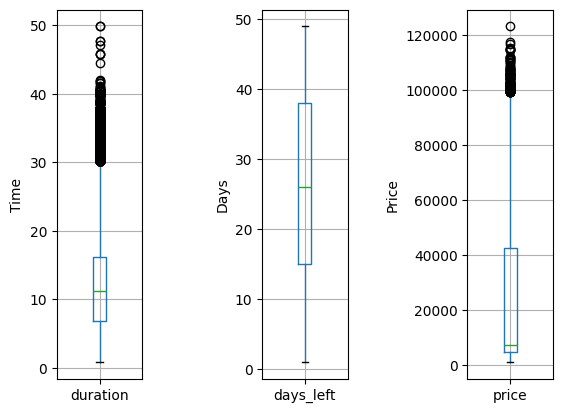

In [46]:
# 시각화로 데이터 확인
import matplotlib.pyplot as plt

plt.figure()

plt.subplot(151)
df[['duration']].boxplot()
plt.ylabel("Time")


plt.subplot(153)
df[['days_left']].boxplot()
plt.ylabel("Days")

plt.subplot(155)
df[['price']].boxplot()
plt.ylabel("Price")

이상치 처리하기
- 이상치는 결측치와 같이 삭제할 수도 있고, 데이터 보존을 위해 대체할 수도 있음

In [47]:
df_origin = df.copy() #원본 데이터 복사

이상치 데이터 삭제하기
- Z-score로 찾아낸 이상치를 제거하는 방법은 확인한 데이터프레임의 인덱스를 리스트로 만들어서 제거

In [49]:
#Z-score 기준으로 신뢰 수준이 95%인 인덱스 추출
outlier = df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96].index

In [50]:
outlier

Index([206691, 206692, 206693, 206694, 206695, 206696, 206697, 206698, 206699,
       206784,
       ...
       300107, 300108, 300109, 300110, 300147, 300148, 300149, 300150, 300151,
       300152],
      dtype='int64', length=12493)

In [51]:
clean_df = df.drop(outlier) # 추출한 인덱스 행 삭제
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287660 entries, 0 to 300146
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        287660 non-null  int64  
 1   airline           287660 non-null  object 
 2   flight            287660 non-null  object 
 3   source_city       287660 non-null  object 
 4   departure_time    287660 non-null  object 
 5   stops             287660 non-null  object 
 6   arrival_time      287660 non-null  object 
 7   destination_city  287660 non-null  object 
 8   class             287660 non-null  object 
 9   duration          287660 non-null  float64
 10  days_left         287660 non-null  int64  
 11  price             287660 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 28.5+ MB


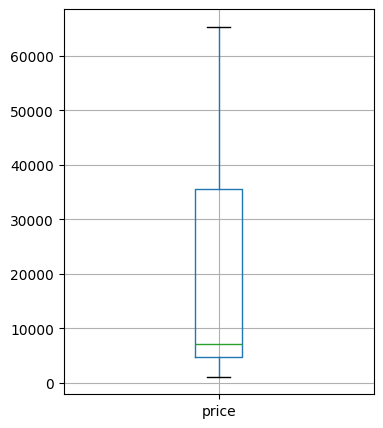

In [52]:
# 시각화 그래프로 이상치 제거 확인
plt.figure(figsize=(4,5))

clean_df[['price']].boxplot()
plt.show()

이상치 데이터 대체하기
- IQR 하단에 있는 이상치는 최솟값으로 대체하고, 상단에 있는 이상치는 최댓값으로 대체하여 처리

In [53]:
def changeOutliers(x, column):

    # 1사분위수
    q1 = x[column].quantile(0.25)

    # 3사분위수
    q3 = x[column].quantile(0.75)

    # IQR*1.5 
    iqr = 1.5*(q3-q1)

    # 이상치를 대체할 MIN, MAX 값 설정 
    Min = (q1-iqr)
    Max = (q3+iqr)

    # 값 대체하기
    x.loc[(x[column]>Max), column] = Max
    x.loc[(x[column]<Min), column] = Min

    return(x)

In [54]:
clean_df = changeOutliers(df, 'price')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [55]:
#price 에 대해 이상치 확인
print("price IQR Outliers: ", findOutliers(df, 'price'))

price IQR Outliers:  0


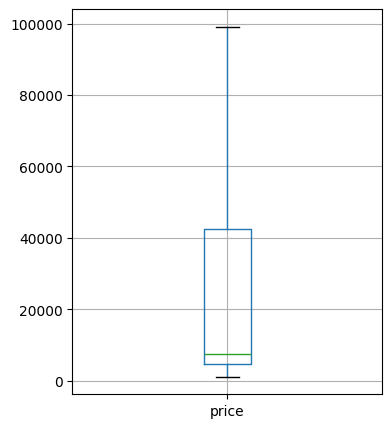

In [56]:
# 시각화로 이상치 대체 확인
plt.figure(figsize=(4,5))
clean_df[['price']].boxplot()
plt.show()

구간화하기
- 구간화는 연속형 데이터를 특정 구간으로 나누어 범주형 또는 순위형으로 변환하는 방법
- 점수 -> 등급, 나이 -> 세대
- 방법 : 동일 길이로 구간화 or 동일 개수로 구간화

동일 길이로 구간화하기 `cut()`
- 구간을 사용자가 지정해서 쉽게 구간화 할 수 있음
- bins : 구간화 지점을 리스트로 지정
- labels : 구간화된 값의 이름을 지정

In [58]:
# 비행시간을 0-5, 5-10, 10 이상의 3개의 구간으로 나누어 거리 칼럼 생성
df['distance'] = pd.cut(df['duration'], bins=[0,5,10,df['duration'].max()], labels=['short', 'medinum', 'long'])
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short


In [59]:
df['distance'].value_counts() #빈도분포 확인

distance
long       169879
medinum     84761
short       45513
Name: count, dtype: int64

동일 개수로 구간화하기 `qcut()`
- cut과 사용방법이 동일
- bins 대신 정수를 넣어 해당 구간만큼 동일한 양의 데이터가 들어가도록 구간화

In [60]:
# 항공권 가격을 4개 구간으로 동일하게 나누어 항공권 가격 비율 컬럼 생성
df['price_rate'] = pd.qcut(df['price'], 4, labels=['cheap', 'nomal', 'expensive', 'too-expensive'])
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,distance,price_rate
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,short,nomal
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,short,nomal
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,short,nomal
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,short,nomal
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,short,nomal


In [62]:
df['price_rate'].value_counts() #빈도분포 확인

price_rate
expensive        75584
nomal            75117
cheap            75073
too-expensive    74379
Name: count, dtype: int64

## SECTION 02. 범주형 데이터 정제하기 

범주형 데이터를 수치형 데이터로 변경하는 과정

판다스에서 레이블 인코딩 `factorize()`
- 결과로 Tuple을 반환
- 새로운 칼럼을 만들기 위해서 array로 변경하고 reshape하여 새로운 칼럼으로 생성
- 등장하는 순서대로 인코딩

In [65]:
df=df_origin.copy()

#airline 컬럼 레이블 인코딩
df['label_encoding'] = pd.factorize(df['airline'])[0].reshape(-1,1)

In [66]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2


In [67]:
print(df['airline'].value_counts()) #빈도표 확인

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


In [68]:
print(df['label_encoding'].value_counts()) #빈도표 확인

label_encoding
2    127859
5     80892
4     43120
3     23173
1     16098
0      9011
Name: count, dtype: int64


사이킷런으로 레이블 인코딩 `LabelEncoder()`
- 사이킷런 : 파이썬에서 머신러닝 분석을 할 때 유용하게 사용하는 라이브러리
- `labelEncoding` 을 활용해서 레이블 인코딩
- 알파벳 순서대로 인코딩

In [70]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['airline_Label_Encoder'] = le.fit_transform(df['airline'])

In [71]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,label_encoding,airline_Label_Encoder
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0,4
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0,4
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,1,0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2,5
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2,5


In [72]:
print(df['airline_Label_Encoder'].value_counts()) #빈도표 확인

airline_Label_Encoder
5    127859
1     80892
3     43120
2     23173
0     16098
4      9011
Name: count, dtype: int64


In [74]:
le.inverse_transform(df['airline_Label_Encoder']).reshape(-1,1) #레이블 인코딩 역변환(디코딩)

array([['SpiceJet'],
       ['SpiceJet'],
       ['AirAsia'],
       ...,
       ['Vistara'],
       ['Vistara'],
       ['Vistara']], dtype=object)

판다스에서 원핫 인코딩 `get_dummies()`
- OneHotEncoding : 1개의 요소는 True 나머지 요소는 False로 인코딩

In [75]:
df = df_origin.copy()

In [76]:
pd.get_dummies(df['class']) # class 컬럼을 OneHotEncoding

,Business,Economy
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
300148,True,False
300149,True,False
300150,True,False
300151,True,False


In [77]:
df = pd.get_dummies(df, columns=['class']) # OneHotencoding 결과를 데이터에 반영
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price,class_Business,class_Economy
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,2.17,1,5953,False,True
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,2.33,1,5953,False,True
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,2.17,1,5956,False,True
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,2.25,1,5955,False,True
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,2.33,1,5955,False,True


사이킷런으로 원핫 인코딩
- get_dummies 와 같이 데이터프레임에 바로 반영할 수 없음

In [78]:
df=df_origin.copy()

In [80]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
encoder = oh.fit_transform(df['class'].values.reshape(-1,1)).toarray() #원핫 인코딩

#원핫인코딩 결과를 데이터 프레임으로 만들기
df_onehot = pd.DataFrame(encoder, columns=["class_"+str(category) for category in oh.categories_[0]])

df1 = pd.concat([df, df_onehot], axis=1) #원본 데이터에 붙이기
df1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,class_Business,class_Economy
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,0.0,1.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,0.0,1.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,0.0,1.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,0.0,1.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,0.0,1.0


## SECTION 03. 스케일링하기 

정규화 하기
- min-max scaling : 데이터의 범위를 0~1 사이로 변환하여 데이터 분포를 조정

In [86]:
df=df_origin.copy()

df_num = df[['duration', 'days_left', 'price']] # 수치형 데이터만 분리
df_num.head()

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955


In [87]:
df_num = (df_num - df_num.min()) / df_num.max()-df_num.min() #정규화 수식 적용
df_num.head()

,duration,days_left,price
0,-0.803109,-1.0,-1104.960608
1,-0.799898,-1.0,-1104.960608
2,-0.803109,-1.0,-1104.960584
3,-0.801503,-1.0,-1104.960592
4,-0.799898,-1.0,-1104.960592


In [88]:
#요약 데이터로 정규화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,-0.601402,-0.489699,-1104.839242
std,0.144331,0.276755,0.184428
min,-0.830000,-1.000000,-1105.000000
25%,-0.709591,-0.714286,-1104.970115
50%,-0.620889,-0.489796,-1104.948648
75%,-0.522153,-0.244898,-1104.663479
max,0.153343,-0.020408,-1104.008979


표준화하기
- 수치형 데이터를 평균이 0이고, 표준편차가 1인 표준 정규분포로 변환 

In [89]:
df_num = df[['duration', 'days_left', 'price']] # 수치형 데이터만 분리
df_num

,duration,days_left,price
0,2.17,1,5953
1,2.33,1,5953
2,2.17,1,5956
3,2.25,1,5955
4,2.33,1,5955
...,...,...,...
300148,10.08,49,69265
300149,10.42,49,77105
300150,13.83,49,79099
300151,10.00,49,81585


In [91]:
df_num = (df_num -df_num.mean())/df_num.std() #표준화 수식 적용
df_num.head()

,duration,days_left,price
0,-1.397528,-1.843872,-0.658067
1,-1.375282,-1.843872,-0.658067
2,-1.397528,-1.843872,-0.657935
3,-1.386405,-1.843872,-0.657979
4,-1.375282,-1.843872,-0.657979


In [92]:
#요약 데이터로 표준화 적용 확인하기
df_num.describe()

,duration,days_left,price
count,3.001530e+05,3.001530e+05,3.001530e+05
mean,6.060207e-18,3.939135e-17,3.030104e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.583847e+00,-1.843872e+00,-8.716567e-01
25%,-7.495861e-01,-8.114997e-01,-7.096143e-01
50%,-1.350141e-01,-3.503362e-04,-5.932152e-01
75%,5.490796e-01,8.845399e-01,9.530162e-01
max,5.229282e+00,1.695689e+00,4.501823e+00


In [97]:
df_plus = df_na.drop(['duration', 'days_left', 'price'], axis=1) # 기존 컬럼 삭제
df_plus = pd.concat([df_plus, df_num], axis=1) # 표준화된 칼럼 붙이기

df_plus.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.000000,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,-1.397528,-1.843872,-0.658067
1,150083.915628,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.375282,-1.843872,-0.658067
2,2.000000,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,-1.397528,-1.843872,-0.657935
3,150083.915628,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.386405,-1.843872,-0.657979
4,4.000000,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,-1.375282,-1.843872,-0.657979


## SECTION 04. 변수 선택하기

하나의 데이터로 여러 개의 새로운 컬럼 만들기

In [98]:
def split_flight(flight): 

    # "-"문자를 기준으로 앞쪽을 제조사 코드
    manufacture = flight.split("-")[0]

    # "-"문자를 기준으로 뒤쪽을 모델명
    model = flight.split("-")[1]

    return manufacture, model

In [99]:
# zip 함수를 사용하여 튜플로 묶어 저장하기
df['manufacture'], df['model_num'] = zip(*df['flight'].apply(lambda x: split_flight(x)))
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,manufacture,model_num
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,SG,8709
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,SG,8157
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,I5,764
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,UK,995
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,UK,963


여러 개의 데이터로 하나의 새로운 컬럼 만들기

In [103]:
#source_city - destination_city를 튜플로 묶어 route 컬럼 생성
df['route'] = df.apply(lambda x: (x['source_city'], x['destination_city']), axis=1)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,manufacture,model_num,route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,SG,8709,"(Delhi, Mumbai)"
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,SG,8157,"(Delhi, Mumbai)"
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,I5,764,"(Delhi, Mumbai)"
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,UK,995,"(Delhi, Mumbai)"
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,UK,963,"(Delhi, Mumbai)"


In [104]:
df.drop(['manufacture', 'model_num'], axis=1).head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,"(Delhi, Mumbai)"
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,"(Delhi, Mumbai)"
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,"(Delhi, Mumbai)"
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,"(Delhi, Mumbai)"
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,"(Delhi, Mumbai)"


변수 선택하기
- RFE(Recursive Feature Elimination) : 머신러닝에 사용되는 변수 선택 방법, 원하는 변수의 수에 도달할 때까지 가장 중요하지 않은 변수를 재귀적으로 제거하는 방법
- RFE-CV(Recursive Feature Elimination With Cross Validataion) : RFE의 변형으로, 변수 선택 과정에 교차 검증을 추가한 것
- UFS(Univariate Feature Selection) : 일변량 통계 테스르를 기반으로 최상의 변수를 선택하여 작동